<a href="https://colab.research.google.com/github/Bhavani0278/Software-Engineering-College-Library-Management-System-/blob/main/Lukemia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from fastai.vision.all import *
from fastai.vision import models
from fastai.metrics import error_rate, accuracy

import warnings
warnings.filterwarnings("ignore")
set_seed(42)

print ('modules loaded')

modules loaded


In [2]:
from google.colab import files
uploaded = files.upload()  # Use this to manually upload your ZIP file


Saving MLProject.zip to MLProject.zip


In [3]:
import zipfile
import os

zip_path = '/content/MLProject.zip'  # or whatever your uploaded file is named
extract_path = '/content/MLProject'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [4]:
import os
import pandas as pd

# Set data directory
data_dir = '/content/MLProject/Original'

filepaths = []
labels = []

# Make sure the data directory exists
if os.path.exists(data_dir):
    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        if os.path.isdir(foldpath):  # check if it's actually a folder
            filelist = os.listdir(foldpath)
            for file in filelist:
                fpath = os.path.join(foldpath, file)
                filepaths.append(fpath)
                labels.append(fold)
else:
    print(f"❌ Directory not found: {data_dir}")

# Combine into a dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

# Optional: Display the first few rows
df.head()


,filepaths,labels
0,/content/MLProject/Original/Pre/WBC-Malignant-Pre-563.jpg,Pre
1,/content/MLProject/Original/Pre/WBC-Malignant-Pre-196.jpg,Pre
2,/content/MLProject/Original/Pre/WBC-Malignant-Pre-286.jpg,Pre
3,/content/MLProject/Original/Pre/WBC-Malignant-Pre-215.jpg,Pre
4,/content/MLProject/Original/Pre/WBC-Malignant-Pre-455.jpg,Pre


In [5]:
df

,filepaths,labels
0,/content/MLProject/Original/Pre/WBC-Malignant-Pre-563.jpg,Pre
1,/content/MLProject/Original/Pre/WBC-Malignant-Pre-196.jpg,Pre
2,/content/MLProject/Original/Pre/WBC-Malignant-Pre-286.jpg,Pre
3,/content/MLProject/Original/Pre/WBC-Malignant-Pre-215.jpg,Pre
4,/content/MLProject/Original/Pre/WBC-Malignant-Pre-455.jpg,Pre
...,...,...
3232,/content/MLProject/Original/Pro/WBC-Malignant-Pro-372.jpg,Pro
3233,/content/MLProject/Original/Pro/WBC-Malignant-Pro-465.jpg,Pro
3234,/content/MLProject/Original/Pro/WBC-Malignant-Pro-224.jpg,Pro
3235,/content/MLProject/Original/Pro/WBC-Malignant-Pro-732.jpg,Pro


In [6]:
# Import all necessary FastAI vision modules
from fastai.vision.all import *

# Load data from folder (make sure to change this path to your actual dataset)
dls = ImageDataLoaders.from_folder(
    '/content/MLProject/Original',   # 🔁 Change this!
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

# Create the vision learner using a model that doesn't require downloading from Hugging Face
learn = vision_learner(
    dls,
    'resnet34',                 # using resnet34 (preloaded with FastAI)
    metrics=[accuracy, error_rate],
    path='.'
).to_fp16()

# Print model summary (optional)
learn.summary()

# Train the model
learn.fit_one_cycle(20)


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.746789,0.609537,0.740340,0.259660,00:09
1,0.977025,0.244112,0.910356,0.089645,00:08
2,0.575916,0.171571,0.938176,0.061824,00:08
3,0.388697,0.149205,0.953632,0.046368,00:09
4,0.280980,0.118362,0.958269,0.041731,00:09
5,0.227323,0.101956,0.972179,0.027821,00:08
6,0.176420,0.075887,0.975270,0.024730,00:08
7,0.145104,0.095681,0.969088,0.030912,00:09
8,0.121256,0.086910,0.975270,0.024730,00:08
9,0.101906,0.075002,0.979907,0.020093,00:08


SuggestedLRs(valley=0.0006918309954926372, slide=0.0014454397605732083)

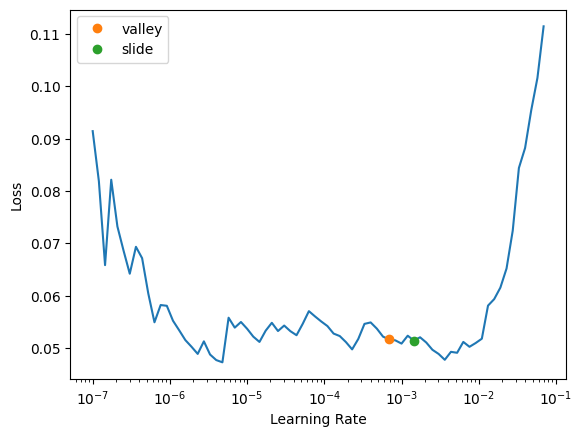

In [7]:
learn.lr_find(suggest_funcs=(valley, slide))

In [8]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.051739,0.079661,0.982998,0.017002,00:08
1,0.062909,0.069639,0.978362,0.021638,00:09
2,0.062285,0.082836,0.979907,0.020093,00:09
3,0.061480,0.089907,0.976816,0.023184,00:08
4,0.061419,0.105323,0.973725,0.026275,00:09
5,0.052879,0.083946,0.978362,0.021638,00:10
6,0.041792,0.078646,0.984544,0.015456,00:09
7,0.041705,0.087214,0.979907,0.020093,00:08
8,0.042898,0.105443,0.978362,0.021638,00:09
9,0.038578,0.090249,0.981453,0.018547,00:09


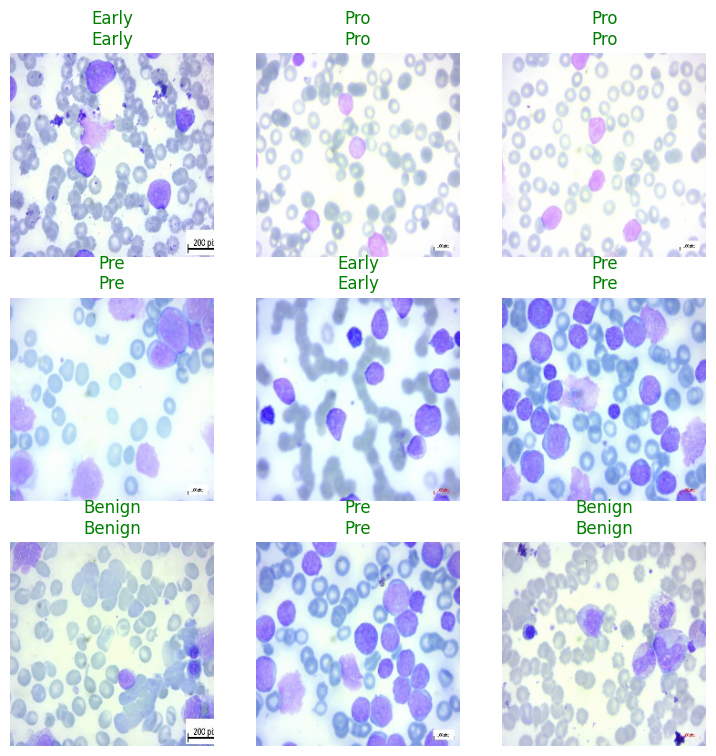

In [9]:
learn.show_results()

In [10]:
learn.save('/content/MLProject/Model')

Path('/content/MLProject/Model.pth')

In [11]:
 #Build a Classification Interpretation object from our learn model
# it can show us where the model made the worse predictions:
interp = ClassificationInterpretation.from_learner(learn)

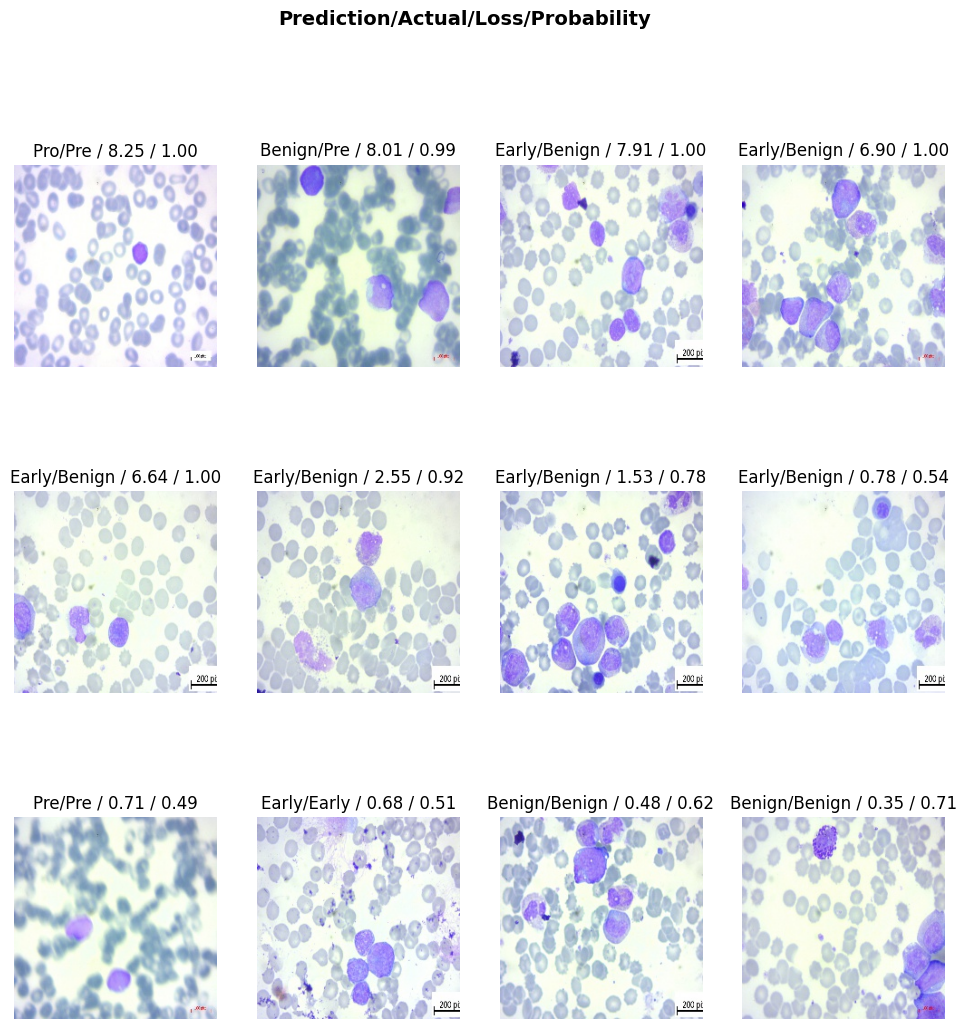

In [12]:
# Plot the top ‘n’ classes where the classifier has least precision.
interp.plot_top_losses(12, figsize=(12,12))

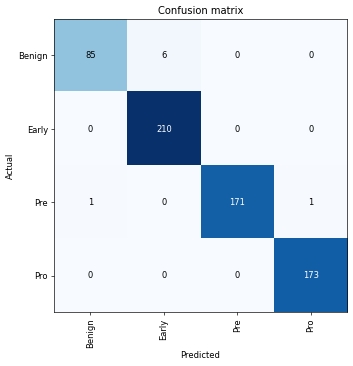

In [13]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [14]:
#To view the list of classes most misclassified as a list
interp.most_confused(min_val=2) #We are ignoring single image misclassification

#Sorted descending list of largest non-diagonal entries of confusion matrix,
#presented as actual, predicted, number of occurrences.

[('Benign', 'Early', np.int64(6))]

In [18]:
from fastai.vision.all import PILImage

# Load your image file (change the path as needed)
img = PILImage.create('/content/MLProject/Original/Benign/WBC-Benign-502.jpg')

# Predict using the learner
pred_class, pred_idx, outputs = learn.predict(img)

# Print the result
print(f"Predicted Class: {pred_class}")
print(f"Prediction Probabilities: {outputs}")


Predicted Class: Benign
Prediction Probabilities: tensor([9.9351e-01, 6.4883e-03, 1.3044e-08, 1.3670e-08])


In [19]:
from fastai.vision.all import PILImage

# Load your image file (change the path as needed)
img = PILImage.create('/content/MLProject/Original/Pre/WBC-Malignant-Pre-943.jpg')

# Predict using the learner
pred_class, _, _ = learn.predict(img)

# Print only the predicted class
print(f"Predicted Class: {pred_class}")


Predicted Class: Pre


In [21]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 28.5 MB/s eta 0:00:00


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.280426,0.205502,0.938176,0.061824,00:17


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.859092,0.127888,0.958269,0.041731,00:20
1,0.796933,0.139807,0.956723,0.043277,00:18
2,0.745887,0.131384,0.958269,0.041731,00:19
3,0.682251,0.101825,0.969088,0.030912,00:18
4,0.664855,0.098342,0.970634,0.029366,00:19


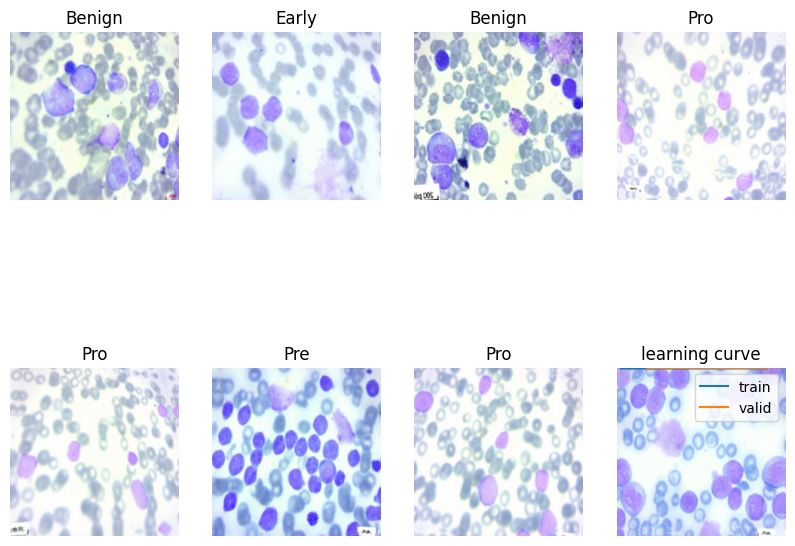

In [26]:
#this is using efficientb3 model
!pip install -q fastai timm optuna

import warnings
from fastai.vision.all import *
import optuna

warnings.filterwarnings("ignore")

# ✅ Point this to your dataset/images folder
data_path = Path("/content/MLProject/Original")

item_tfms = Resize(256)
batch_tfms = [ToTensor(), Normalize.from_stats(*imagenet_stats), *aug_transforms(size=224)]

# ✅ Build the DataBlock using folder names as labels
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = dblock.dataloaders(data_path, bs=64)

# ✅ Define the learner using EfficientNet-B3 and MixUp
learn = vision_learner(
    dls,
    arch='efficientnet_b3',
    metrics=[accuracy, error_rate],
    cbs=[MixUp()]
).to_fp16()

# 👀 Optional: check if batch looks okay
dls.show_batch(max_n=8, figsize=(10, 8))

# 🚀 Train the model
learn.fine_tune(5)

# 📈 Plot training loss
learn.recorder.plot_loss()

# 💾 Save the model
learn.export("efficientnet_b3_mixup_float.pkl")


In [29]:
import optuna
from fastai.vision.all import *
from timm import create_model

# Set your dataset path
data_path = Path("/content/MLProject/Original")

def objective(trial):
    # Hyperparams to try
    arch = trial.suggest_categorical('arch', ['efficientnet_b0', 'efficientnet_b3', 'resnet34'])
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    mixup = trial.suggest_categorical('mixup', [True, False])

    # Callbacks
    callbacks = [MixUp()] if mixup else []

    # Load images directly from folder structure
    dls = ImageDataLoaders.from_folder(
        data_path,
        valid_pct=0.2,
        seed=42,
        item_tfms=Resize(256),
        batch_tfms=[Normalize.from_stats(*imagenet_stats), *aug_transforms(size=224)],
        bs=64
    )

    # Define and train model
    learn = vision_learner(dls, arch=arch, metrics=accuracy, cbs=callbacks).to_fp16()
    learn.fine_tune(3, base_lr=lr)

    # Return accuracy
    acc = learn.validate()[1]
    return acc

# Start the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)  # 🔁 Set trials (5 for speed, you can increase)


[I 2025-04-07 21:51:10,370] A new study created in memory with name: no-name-b888edde-4253-4fb9-bbc4-542a596b288d


epoch,train_loss,valid_loss,accuracy,time
0,1.174035,0.209853,0.931994,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.340239,0.144498,0.955178,00:19
1,0.261726,0.115214,0.962906,00:18
2,0.224721,0.105224,0.967543,00:19


[I 2025-04-07 21:52:26,699] Trial 0 finished with value: 0.9675425291061401 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.00028116031888886114, 'mixup': False}. Best is trial 0 with value: 0.9675425291061401.


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.749748,0.142801,0.956723,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.169806,0.127376,0.964451,00:15
1,0.152349,0.060085,0.972179,00:14
2,0.135620,0.063897,0.973725,00:13


[I 2025-04-07 21:53:26,752] Trial 1 finished with value: 0.973724901676178 and parameters: {'arch': 'efficientnet_b0', 'lr': 0.0011723501896315108, 'mixup': False}. Best is trial 1 with value: 0.973724901676178.


epoch,train_loss,valid_loss,accuracy,time
0,1.131710,0.199713,0.921175,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.349982,0.139701,0.950541,00:12
1,0.278005,0.125832,0.961360,00:12
2,0.244644,0.129169,0.961360,00:12


[I 2025-04-07 21:54:19,802] Trial 2 finished with value: 0.9613600969314575 and parameters: {'arch': 'resnet34', 'lr': 0.0008431055894383642, 'mixup': False}. Best is trial 1 with value: 0.973724901676178.


epoch,train_loss,valid_loss,accuracy,time
0,1.656723,0.432754,0.843895,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.802751,0.328145,0.871716,00:13
1,0.646355,0.241648,0.899536,00:13
2,0.560598,0.227325,0.913447,00:13


[I 2025-04-07 21:55:16,390] Trial 3 finished with value: 0.9134466648101807 and parameters: {'arch': 'resnet34', 'lr': 0.00020770608449179734, 'mixup': False}. Best is trial 1 with value: 0.973724901676178.


epoch,train_loss,valid_loss,accuracy,time
0,0.720518,0.122465,0.965997,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.158694,0.126696,0.958269,00:18
1,0.150428,0.084610,0.976816,00:19
2,0.134537,0.092615,0.970634,00:18


[I 2025-04-07 21:56:32,664] Trial 4 finished with value: 0.9706336855888367 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.0013077487511732745, 'mixup': False}. Best is trial 1 with value: 0.973724901676178.


In [30]:
!pip install optuna-dashboard


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.7 MB/s eta 0:00:00


In [31]:
import optuna

# 🔁 Save to SQLite so dashboard can read it
storage = "sqlite:///optuna_study.db"
study = optuna.create_study(direction="maximize", study_name="efficientb3_study", storage=storage, load_if_exists=True)
study.optimize(objective, n_trials=10)  # You can increase trials


[I 2025-04-07 21:57:10,866] A new study created in RDB with name: efficientb3_study


epoch,train_loss,valid_loss,accuracy,time
0,0.539986,0.150663,0.965997,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.151063,0.145193,0.970634,00:18
1,0.137252,0.102649,0.973725,00:19
2,0.111081,0.083386,0.978362,00:18


[I 2025-04-07 21:58:27,327] Trial 0 finished with value: 0.9783616662025452 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.004178537519385593, 'mixup': False}. Best is trial 0 with value: 0.9783616662025452.


epoch,train_loss,valid_loss,accuracy,time
0,1.603348,0.308122,0.885626,00:11


epoch,train_loss,valid_loss,accuracy,time
0,1.041081,0.233575,0.924266,00:13
1,0.967090,0.192185,0.935085,00:12
2,0.954426,0.175867,0.941267,00:13


[I 2025-04-07 21:59:21,818] Trial 1 finished with value: 0.9412673711776733 and parameters: {'arch': 'resnet34', 'lr': 0.0005643920304480961, 'mixup': True}. Best is trial 0 with value: 0.9783616662025452.


epoch,train_loss,valid_loss,accuracy,time
0,1.302202,0.198805,0.931994,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.871242,0.155055,0.950541,00:13
1,0.850538,0.114453,0.965997,00:14
2,0.783019,0.120038,0.962906,00:15


[I 2025-04-07 22:00:21,928] Trial 2 finished with value: 0.9629057049751282 and parameters: {'arch': 'efficientnet_b0', 'lr': 0.001145947934862499, 'mixup': True}. Best is trial 0 with value: 0.9783616662025452.


epoch,train_loss,valid_loss,accuracy,time
0,0.512896,0.103518,0.965997,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.133160,0.104981,0.964451,00:19
1,0.120607,0.099115,0.972179,00:18
2,0.099014,0.080318,0.981453,00:19


[I 2025-04-07 22:01:39,832] Trial 3 finished with value: 0.9814528822898865 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.004986342431318052, 'mixup': False}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,1.597579,0.285606,0.907264,00:16


epoch,train_loss,valid_loss,accuracy,time
0,1.012402,0.171370,0.944359,00:18
1,0.950279,0.142509,0.952087,00:18
2,0.927795,0.136601,0.952087,00:19


[I 2025-04-07 22:02:56,320] Trial 4 finished with value: 0.9520865678787231 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.0003004532382328137, 'mixup': True}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,1.142601,0.230717,0.902628,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.377090,0.156018,0.947450,00:12
1,0.288802,0.133937,0.956723,00:12
2,0.252096,0.125544,0.961360,00:12


[I 2025-04-07 22:03:49,674] Trial 5 finished with value: 0.9613600969314575 and parameters: {'arch': 'resnet34', 'lr': 0.0007812401290996837, 'mixup': False}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,1.270476,0.154769,0.950541,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.811709,0.143286,0.950541,00:18
1,0.752296,0.101154,0.965997,00:19
2,0.700233,0.100037,0.967543,00:18


[I 2025-04-07 22:05:06,768] Trial 6 finished with value: 0.9675425291061401 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.002628892024385058, 'mixup': True}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,1.524283,0.237190,0.916538,00:12


epoch,train_loss,valid_loss,accuracy,time
0,1.015778,0.181843,0.939722,00:14
1,0.938138,0.156028,0.956723,00:14
2,0.897314,0.146973,0.959815,00:14


[I 2025-04-07 22:06:06,442] Trial 7 finished with value: 0.9598145484924316 and parameters: {'arch': 'efficientnet_b0', 'lr': 0.00033112569836617455, 'mixup': True}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,1.248391,0.214434,0.922720,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.342917,0.143463,0.962906,00:19
1,0.258964,0.114988,0.965997,00:18
2,0.210938,0.110219,0.967543,00:19


[I 2025-04-07 22:07:22,460] Trial 8 finished with value: 0.9675425291061401 and parameters: {'arch': 'efficientnet_b3', 'lr': 0.000263454333377798, 'mixup': False}. Best is trial 3 with value: 0.9814528822898865.


epoch,train_loss,valid_loss,accuracy,time
0,0.545113,0.150452,0.945904,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.218915,0.228210,0.944359,00:12
1,0.210051,0.152736,0.961360,00:12
2,0.169239,0.126196,0.967543,00:12


[I 2025-04-07 22:08:15,336] Trial 9 finished with value: 0.9675425291061401 and parameters: {'arch': 'resnet34', 'lr': 0.007735935103545257, 'mixup': False}. Best is trial 3 with value: 0.9814528822898865.


In [37]:
import optuna.visualization as vis

# 1. Plot optimization history (how accuracy improved trial-by-trial)
vis.plot_optimization_history(study).show()

# 2. Plot parameter importance (which hyperparameter mattered most)
vis.plot_param_importances(study).show()

# 3. Plot learning rate vs. accuracy (scatter)
vis.plot_slice(study).show()


In [38]:
best_trial = study.best_trial
print("Best Accuracy:", best_trial.value)
print("Best Params:", best_trial.params)


Best Accuracy: 0.9814528822898865
Best Params: {'arch': 'efficientnet_b3', 'lr': 0.004986342431318052, 'mixup': False}


In [39]:
best_arch = best_trial.params['arch']
best_lr = best_trial.params['lr']
use_mixup = best_trial.params['mixup']

learn = vision_learner(
    dls,
    arch=best_arch,
    metrics=[accuracy, error_rate],
    cbs=[MixUp()] if use_mixup else []
).to_fp16()

learn.fine_tune(5, base_lr=best_lr)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.475908,0.153640,0.965997,0.034003,00:16


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.164306,0.139985,0.964451,0.035549,00:20
1,0.158078,0.090615,0.976816,0.023184,00:20
2,0.125418,0.088710,0.976816,0.023184,00:25
3,0.096974,0.090774,0.979907,0.020093,00:18
4,0.065980,0.092745,0.978362,0.021638,00:19


In [40]:
learn.export("efficientnet_best_optuna.pkl")


In [41]:
learn.export('best_model.pkl')


In [46]:
learn_inf = load_learner('best_model.pkl')
pred, pred_idx, probs = learn_inf.predict('/content/MLProject/Original/Pre/WBC-Malignant-Pre-943.jpg')


In [48]:


# Load your trained model
learn_inf = load_learner('best_model.pkl')

# Load image
img_path = '/content/MLProject/Original/Pre/WBC-Malignant-Pre-943.jpg'  # change this to your actual image path
img_path = '/content/MLProject/Original/Pre/WBC-Malignant-Pre-943.jpg'  # make sure this is correct
pred, pred_idx, probs = learn_inf.predict(img_path)


# Print results
print(f"Predicted class: {pred}")
print(f"Class index: {pred_idx}")
print(f"Class probabilities:")
for cls, prob in zip(learn_inf.dls.vocab, probs):
    print(f"  {cls}: {prob:.4f}")


Predicted class: Pre
Class index: 2
Class probabilities:
  Benign: 0.0000
  Early: 0.0000
  Pre: 1.0000
  Pro: 0.0000


In [50]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.4 MB/s eta 0:00:00


In [51]:
import gradio as gr

def classify_image(img):
    pred, pred_idx, probs = learn_inf.predict(img)
    return {str(pred): float(probs[pred_idx])}

gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3)
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1a299d077a364a90b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
